# Nonlinear Regression



In [1]:
import numpy as np 
import matplotlib.pyplot as plt 



[10. 20. 30. 40. 50. 60. 70. 80.]
[  25.   70.  380.  550.  610. 1220.  830. 1450.]


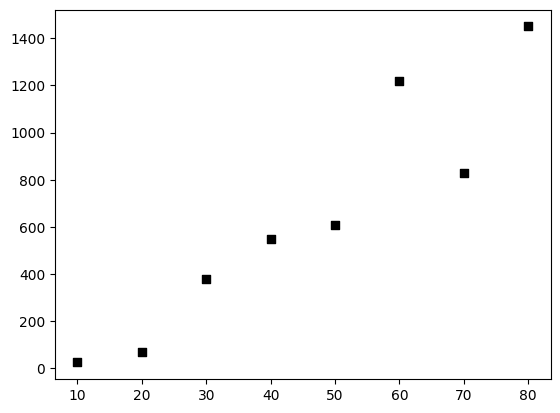

In [4]:
# - - - - - - - -
# example 14.7
# - - - - - - - -

xi = np.linspace(1,8,8)*10
yi = np.array([25, 70, 380, 550, 610, 1220, 830, 1450],dtype=float)
print(xi)
print(yi)

plt.scatter(xi,yi,c='k',marker='s')

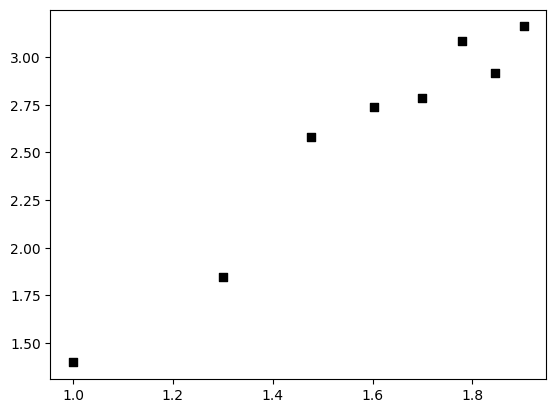

In [8]:
log_xi = np.log10(xi)
log_yi = np.log10(yi)
# log-log plot
plt.scatter(log_xi,log_yi,c='k',marker='s')

In [10]:
sum_log_xi = np.sum(log_xi)
sum_log_yi = np.sum(log_yi)
n = len(xi)
# sample mean
log_xi_bar = sum_log_xi/n
log_yi_bar = sum_log_yi/n
# a1 
sum_log_xi_log_yi = np.sum(log_xi*log_yi)
sum_log_xi2 = np.sum(log_xi**2.)
a1 = (n*sum_log_xi_log_yi - sum_log_xi * sum_log_yi)/(n*sum_log_xi2 - sum_log_xi**2.)
# a0
a0 = log_yi_bar - a1 * log_xi_bar
print('a0={}, a1={}'.format(a0,a1))


a0=-0.5620318023820663, a1=1.9841762557640021


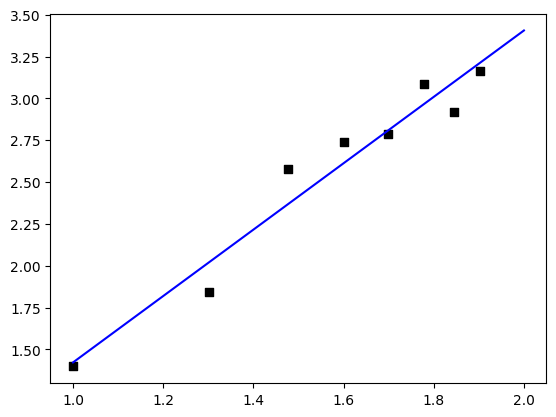

In [13]:
# y = alpha * x^beta
# log10(y) = log10(alpha) + beta * log10(x)
xhat = np.linspace(1,2,101)
yhat = a0 + a1 * xhat

# log-log plot
plt.scatter(log_xi,log_yi,c='k',marker='s')
plt.plot(xhat,yhat,c='b')

In [14]:
xi

array([10., 20., 30., 40., 50., 60., 70., 80.])

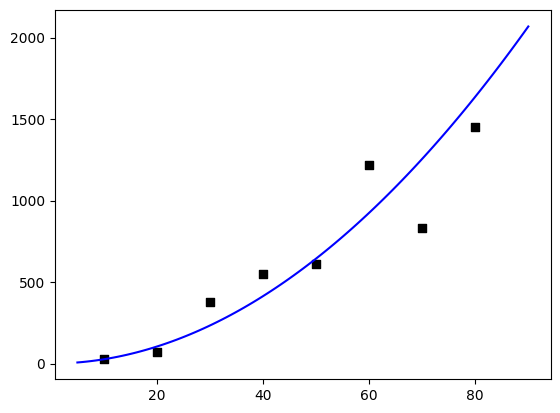

In [17]:
# Recover alpha and beta from a0 and a1
# y = alpha * x^beta
# log10(y) = log10(alpha) + beta * log10(x)

xhat = np.linspace(5,90,101)
yhat = 10.**a0 * xhat**a1

# xy plot
plt.scatter(xi,yi,c='k',marker='s')
plt.plot(xhat,yhat,c='b')

## Polynomial Regression





In [44]:
# ex) 15.1 

xi = np.array([0, 1, 2, 3, 4, 5], dtype=float)
yi = np.array([2.1, 7.7, 13.6, 27.2, 40.9, 61.1])

n = len(xi)
sum_xi = np.sum(xi)
sum_xi2 = np.sum(xi*xi)
sum_xi3 = np.sum(xi*xi*xi)
sum_xi4 = np.sum(xi*xi*xi*xi)
sum_yi = np.sum(yi)
sum_yixi = np.sum(yi*xi)
sum_yixi2 = np.sum(yi*xi*xi)

xi_bar = np.sum(xi)/n 
yi_bar = np.sum(yi)/n 
SST = np.sum((yi-yi_bar)**2.)
print('SST=', SST)

# solve for c
A = np.array([[n, sum_xi, sum_xi2], 
              [sum_xi, sum_xi2, sum_xi3], 
              [sum_xi2, sum_xi3, sum_xi4]])
b = np.array([sum_yi, sum_yixi, sum_yixi2])
c = np.linalg.solve(A,b)
print(c) # the coefficients of the quadratic polynomial



SST= 2513.3933333333334
[2.47857143 2.35928571 1.86071429]


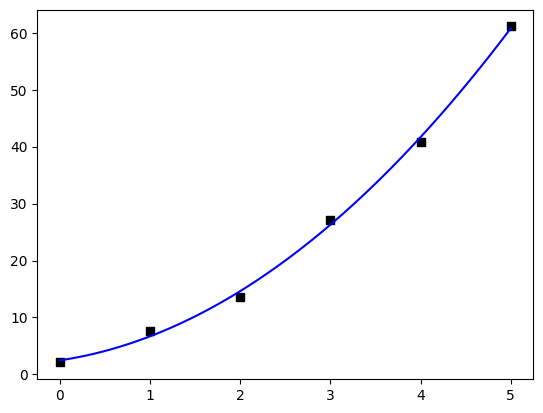

In [20]:
# prediction
xhat = np.linspace(0,5,101)
yhat = c[0] + c[1] * xhat + c[2] * xhat**2.

plt.scatter(xi,yi,c='k',marker='s')
plt.plot(xhat,yhat,c='b')

In [37]:
# stats 
yhati = c[0] + c[1] * xi + c[2] * xi**2.
ei = yi - yhati
print(ei)

# the residual sum of squares
SSE = np.sum(ei**2.)
print('SSE = ', SSE)
SSE == ei.dot(ei)

# the regression sum of squares
SSR = np.sum((yhati - yi_bar)**2.)
print('SSR = ', SSR)

print(SST)
print(SSR + SSE)

# the standard error of the estimate
se = np.sqrt(SSE/(n-3))
print('se=',se)


[-0.37857143  1.00142857 -1.04        0.89714286 -0.78714286  0.30714286]
SSE =  3.7465714285714293
SSR =  2509.646761904763
2513.3933333333334
2513.3933333333343
se= 1.1175227706213162


In [62]:
# ex) 15.2, Multiple Linear Regression

x1 = np.array([0, 2, 2.5, 1, 4, 7])
x2 = np.array([0, 1, 2, 3, 6, 2], dtype=float)
y = np.array([5.16, 9.91, 8.91, 0.27, 3.07, 27.04])

n = len(x1)
x1_bar = np.sum(x1)/ n 
x2_bar = np.sum(x2)/ n 
y_bar = np.sum(y)/ n 


In [63]:
# compute the coefficients of the linear function, 
# y = c0 + c1*x1 + c2*x2 

sum_x1 = np.sum(x1)
sum_x2 = np.sum(x2)
sum_y = np.sum(y)

sum_x1x1 = np.sum(x1*x1)
sum_x1x2 = np.sum(x1*x2)
sum_x2x2 = np.sum(x2*x2)
sum_x1y = np.sum(x1*y)
sum_x2y = np.sum(x2*y)

# solve for c
A = np.array([[n, sum_x1, sum_x2], 
              [sum_x1, sum_x1x1, sum_x1x2], 
              [sum_x2, sum_x1x2, sum_x2x2]])
b = np.array([sum_y, sum_x1y, sum_x2y])
c = np.linalg.solve(A,b)
print(c) # the coefficients of the linear function



[ 5.08012462  3.97545228 -2.97969359]


In [72]:
# prediction
xx1,xx2 = np.meshgrid (x1,x2)

yy = c[0] + c[1] * xx1 + c[2] * xx2 

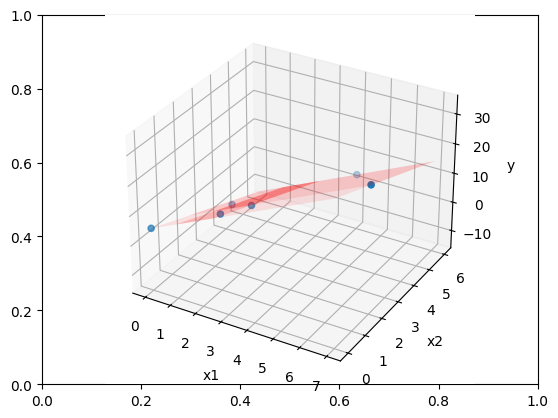

In [73]:



from mpl_toolkits.mplot3d import Axes3D 


fig = plt.figure()
ax = plt.subplot(111)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1,x2,y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.plot_surface(xx1, xx2, yy, alpha=0.1, color='r',shade=False)
plt.show()

In [84]:
# 15.3, General Linear Regression-Refractive Index of Borosilicate Glass 
# ridx = c0 + b1*1/wavelength^2 + c[2]*1/wavelength^4
# collect refractive index of borosilicate glass at different wavelengths
wavelength = np.array([0.6563, 0.6439, 0.5890, 0.5338, 0.5086, 0.4861, 0.4340, 0.3988])
ridx = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])

laminv2 = (1./wavelength)**2.
laminv4 = (1./wavelength)**4.

n = len(ridx)
print(n)

# solve for c
A = np.array([[1, laminv2[0], laminv4[0]], 
              [1, laminv2[1], laminv4[1]], 
              [1, laminv2[2], laminv4[2]], 
              [1, laminv2[3], laminv4[3]], 
              [1, laminv2[4], laminv4[4]], 
              [1, laminv2[5], laminv4[5]], 
              [1, laminv2[6], laminv4[6]], 
              [1, laminv2[7], laminv4[7]]])
b = ridx
c = np.linalg.solve(A,b)

# What is the problem? why? 




8


LinAlgError: Last 2 dimensions of the array must be square

In [85]:
A.transpose() @ A

array([[   8.        ,   30.82020997,  132.40896538],
       [  30.82020997,  132.40896538,  625.51695252],
       [ 132.40896538,  625.51695252, 3185.22592513]])

In [86]:
A.transpose() @ b

array([ 12.12216   ,  46.75828318, 201.11903942])

In [87]:
c = np.linalg.solve(A.transpose() @ A,A.transpose() @ b)
print(c)

[ 1.49887227e+00  4.32116851e-03 -1.50855978e-05]


In [88]:
# now Cauch's equation model becomes 
f = lambda x: c[0] + c[1]/(x**2.) + c[2]/(x**4.)

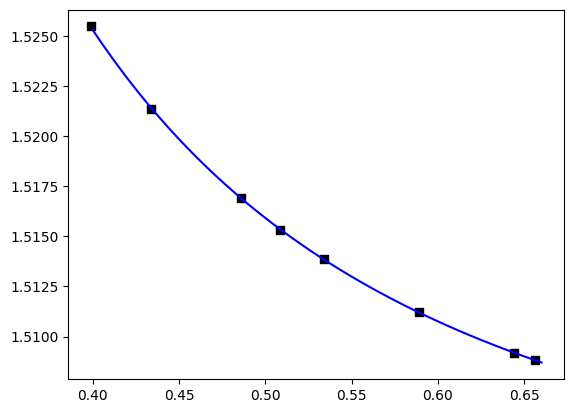

In [90]:
# prediction
xi = wavelength 
yi = ridx

xhat = np.linspace(0.4,0.66,101)
yhat = f(xhat)

plt.scatter(xi,yi,c='k',marker='s')
plt.plot(xhat,yhat,c='b')

In [106]:
ybar = np.sum(yi)/len(yi)
SST = np.sum((yi-ybar)**2)
print('SST = ', SST )

yhati = f(xi)
SSE = np.sum((yi-yhati)**2)
print('SSE = ', SSE )

R2 = 1 - SSE/SST
print('R2 = ', R2)

se = np.sqrt(SSE/(n-3))
print('se =', se)

# covariance matrix for the parameter estimates
cov = se**2. * np.linalg.inv(A.transpose()@A)

# standard error for each parameter
std_err = np.sqrt(np.diag(cov))
print('std err for c0 = ', std_err[0])
print('std err for c1 = ', std_err[1])
print('std err for c2 = ', std_err[2])

# c[2] - 3*stderr < c[2] < c[2] + 3*stderr
sf = 3.
print('min c[2] = ', c[2] - sf * std_err[2])
print('max c[2] = ', c[2] + sf * std_err[2])
# c[2] is very small number => we may omit c[2]


SST =  0.00024049860000000434
SSE =  4.1333377382546075e-09
R2 =  0.9999828134644515
se = 2.8751826857626306e-05
std err for c0 =  0.0001083512220291328
std err for c1 =  5.533421685564258e-05
std err for c2 =  6.49083775744182e-06
min c[2] =  -3.4558111115893684e-05
max c[2] =  4.3869154287572355e-06


In [109]:
# solve for c
A = np.array([[1, laminv2[0]], 
              [1, laminv2[1]], 
              [1, laminv2[2]], 
              [1, laminv2[3]], 
              [1, laminv2[4]], 
              [1, laminv2[5]], 
              [1, laminv2[6]], 
              [1, laminv2[7]]])
b = ridx
c = np.linalg.solve(A.transpose()@A,A.transpose()@b)
print(c) 

# now Cauch's equation model becomes 
f_lin = lambda x: c[0] + c[1]/(x**2.) 

[1.49911312 0.00419384]


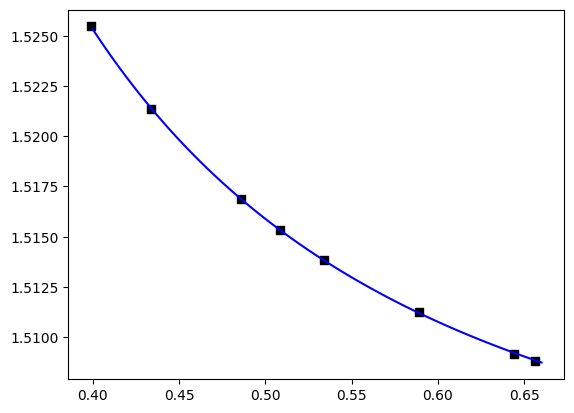

In [110]:
# prediction
xi = wavelength 
yi = ridx

xhat = np.linspace(0.4,0.66,101)
yhat = f_lin(xhat)

plt.scatter(xi,yi,c='k',marker='s')
plt.plot(xhat,yhat,c='b')

In [115]:
ybar = np.sum(yi)/len(yi)
SST = np.sum((yi-ybar)**2)
print('SST = ', SST )

yhati = f_lin(xi)
SSE = np.sum((yi-yhati)**2)
print('SSE = ', SSE )

R2 = 1 - SSE/SST
print('R2 = ', R2)

se = np.sqrt(SSE/(n-3))
print('se =', se)

# covariance matrix for the parameter estimates
cov = se**2. * np.linalg.inv(A.transpose()@A)

# standard error for each parameter
std_err = np.sqrt(np.diag(cov))
print('std err for c0 = ', std_err[0])
print('std err for c1 = ', std_err[1])

print('c0 = ', c[0])
print('c1 = ', c[1])



SST =  0.00024049860000000434
SSE =  8.598676717761226e-09
R2 =  0.9999642464583255
se = 4.1469691867100305e-05
std err for c0 =  4.562552535037264e-05
std err for c1 =  1.1214868240809494e-05
c0 =  1.4991131205129284
c1 =  0.004193840211834032


In [147]:
# ex 15.4

x = np.array([0., 4.44, 10., 15.56, 21.11, 26.67, 32.22, 37.78, 48.89, 60., 71.11, 82.22, 93.33 ])
y = np.array([1.794, 1.546, 1.31, 1.129, 0.982, 0.862, 0.764, 0.682, 0.559, 0.47, 0.401, 0.347, 0.305])

def ex_15_4(m):

    # standardize x to z 
    xbar = np.mean(x)
    sx = np.std(x)
    z = (x-xbar)/sx 
    n = len(x)
    # m = 8


    X = np.zeros((n,m+1)) # n x (m+1) matrix 
    for i in range(n):
        for j in range(m+1):
            X[i,j] = z[i]**j # jth order

    Xt= np.transpose(X)
    A = np.dot(Xt,X)
    const = np.dot(Xt, y) # Xt@y
    b = np.linalg.solve(A,const)
    print('Estimated model parameters are:\n', b)
    #compute model predictions and residuals 
    yhat = np.zeros((n))
    e = np.zeros((n))
    for i in range(n):
        for j in range(m+1):
            yhat[i] = yhat[i] + b[j]*z[i]**j
        e[i] = y[i] - yhat[i]

    # compute the sum of squares 
    SSE = np.dot(e,e)
    SST = np.var(y)*n
    SSR = SST - SSE # regression
    print('SSE = ', SSE)
    print('SST = ', SST)
    print('SSR = ', SSR)

    # R2 and the stndard error of the estimate 
    R2 = SSR/ SST 
    se2 = SSE/(n-(m+1))
    se = np.sqrt(se2)
    print('R-squared = ', R2)
    print('Standard Error of the estimate = ', se)
    # adjusted R2 
    R2adj = 1 - (SSE/(n-(m+1)))/(SST/(n-1))
    print('Adjusted R-squared = ', R2adj)
    # covariance matrix and parameter standard errors 
    XtXinv = np.linalg.inv(np.dot(Xt,X))
    covb = XtXinv*se2 
    seb = np.zeros((m+1))
    for j in range(m+1):
        seb[j] = np.sqrt(se2*covb[j,j])
    print('Standard errors of the parameter estimates: \n', seb )
    # hatmatrix, PRESS staistic and predicted R2 
    H = np.dot(np.dot(X,XtXinv), Xt) 
    PRESS = 0 
    for i in range(n): 
        PRESS = PRESS + (e[i]/ (1-H[i,i]))**2.
    R2pred = 1 - PRESS/SST 
    print('PRESS = ', PRESS) 




yhat

In [148]:
ex_15_4(2)

Estimated model parameters are:
 [ 0.66898204 -0.50752418  0.18878719]
SSE =  0.04387720062491496
SST =  2.698112307692308
SSR =  2.654235107067393
R-squared =  0.9837378153237649
Standard Error of the estimate =  0.06623986762133131
Adjusted R-squared =  0.980485378388518
Standard errors of the parameter estimates: 
 [0.00184482 0.00137498 0.00138652]
PRESS =  0.1132903605723383


In [149]:
ex_15_4(3)

Estimated model parameters are:
 [ 0.65206834 -0.38645139  0.23930657 -0.07279969]
SSE =  0.003983971222806515
SST =  2.698112307692308
SSR =  2.6941283364695017
R-squared =  0.9985234227606286
Standard Error of the estimate =  0.021039569130586393
Adjusted R-squared =  0.9980312303475047
Standard errors of the parameter estimates: 
 [0.00018986 0.00030207 0.00017917 0.00016134]
PRESS =  0.020649160438203355


In [152]:
ex_15_4(4)

Estimated model parameters are:
 [ 0.67029516 -0.35561165  0.1802729  -0.10069814  0.02706682]
SSE =  0.0004491454472113174
SST =  2.698112307692308
SSR =  2.697663162245097
R-squared =  0.9998335334500603
Standard Error of the estimate =  0.007492875342711547
Adjusted R-squared =  0.9997503001750905
Standard errors of the parameter estimates: 
 [2.95983489e-05 4.81232665e-05 6.01997445e-05 3.33585321e-05
 2.55593781e-05]
PRESS =  0.004913895038658968


In [153]:
ex_15_4(5)

Estimated model parameters are:
 [ 0.67339962 -0.37086365  0.15887252 -0.07404558  0.04001281 -0.01029659]
SSE =  0.00011194640279882603
SST =  2.698112307692308
SSR =  2.6980003612895094
R-squared =  0.9999585093613488
Standard Error of the estimate =  0.003999042792591141
Adjusted R-squared =  0.9999288731908836
Standard errors of the parameter estimates: 
 [8.85397093e-06 1.90877863e-05 2.53260683e-05 2.50813895e-05
 1.34210643e-05 8.96731652e-06]
PRESS =  0.003912243043709293


In [154]:
ex_15_4(6)

Estimated model parameters are:
 [ 0.6706958  -0.38054932  0.17650962 -0.05059535  0.01881654 -0.02071915
  0.0071038 ]
SSE =  2.5582895246098116e-05
SST =  2.698112307692308
SSR =  2.698086724797062
R-squared =  0.9999905182244737
Standard Error of the estimate =  0.0020649009357229914
Adjusted R-squared =  0.9999810364489475
Standard errors of the parameter estimates: 
 [2.66672680e-06 6.75626944e-06 1.05392543e-05 1.26679882e-05
 1.03624783e-05 5.34634232e-06 3.25929845e-06]
PRESS =  0.007295157978118509


In [155]:
ex_15_4(7)

Estimated model parameters are:
 [ 0.66961916 -0.37542961  0.19079787 -0.06821863 -0.0034332  -0.00370307
  0.0152451  -0.00510369]
SSE =  1.8049418483231618e-06
SST =  2.698112307692308
SSR =  2.6981105027504597
R-squared =  0.9999993310353156
Standard Error of the estimate =  0.0006008230768409552
Adjusted R-squared =  0.9999983944847575
Standard errors of the parameter estimates: 
 [2.39429258e-07 6.86178909e-07 1.38384289e-06 1.68890017e-06
 1.86621766e-06 1.33854870e-06 6.62864406e-07 3.77824366e-07]
PRESS =  0.0025434301219886216


In [156]:
ex_15_4(8)

Estimated model parameters are:
 [ 0.6699299  -0.37387496  0.18725835 -0.07568997  0.00434092  0.00468778
  0.00918026 -0.00770462  0.0015929 ]
SSE =  8.980518189532902e-07
SST =  2.698112307692308
SSR =  2.698111409640489
R-squared =  0.9999996671555085
Standard Error of the estimate =  0.00047382798011337676
Adjusted R-squared =  0.9999990014665256
Standard errors of the parameter estimates: 
 [1.65955966e-07 5.62550226e-07 1.19878252e-06 2.05083558e-06
 2.16940713e-06 2.14623598e-06 1.48807368e-06 6.56669634e-07
 3.75536310e-07]
PRESS =  0.00010339434286305039
